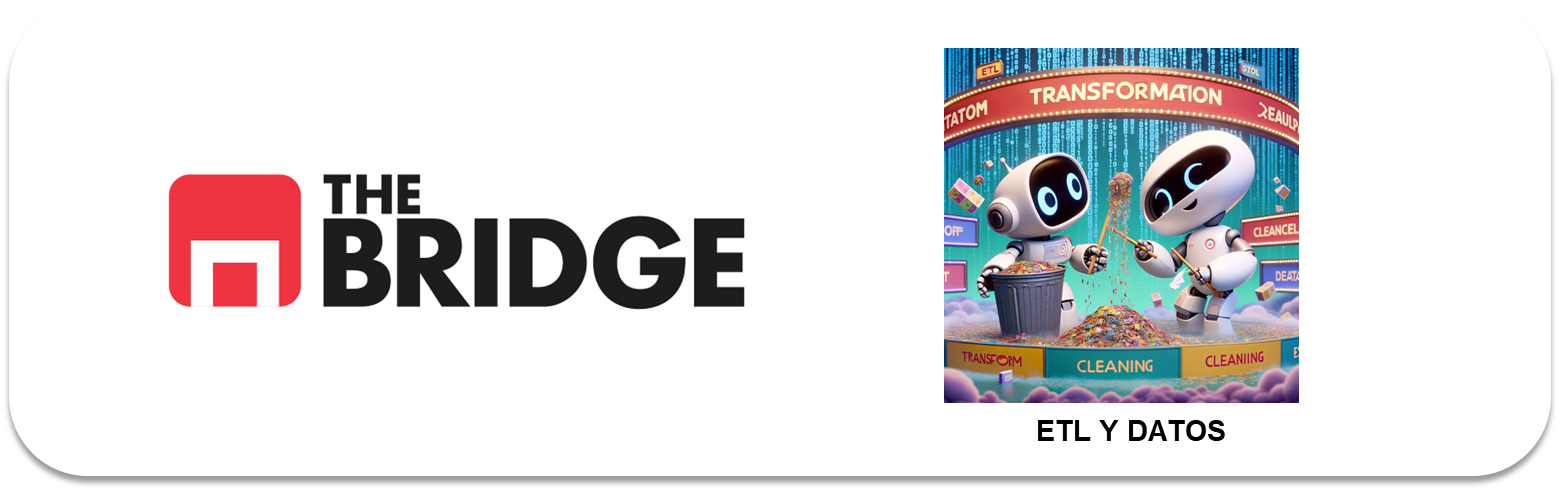

## ETL: Tratamiento de Numeros

El tratamiento real de los campos numéricos llega con el análisis y re-análisis, pero antes además de hacer limpieza de los campos numéricos podemos, al igual que hicimos con los campos de tipo texto, obtener algunas columnas adicionales bastante directas previas a entrar en el ciclo de análisis-re-análisis. A eso vamos a dedicar la sesión. 

Para empezar, cargamos nuestro dataset de partidos de 2019.

In [1]:
import pandas as pd
import numpy as np 

df_liga  = pd.read_csv("./data/df_liga_2019.csv")



### Transformaciones directas

Para empezar echemos otro vistazo a nuestro dataset futbolero:

In [2]:
df_liga.columns

Index(['id_partido', 'equipo_local', 'equipo_visitante', 'Division',
       'Temporada', 'fecha_dt', 'goles_local', 'goles_visitante', 'arbitro',
       'estadio', 'odd_1', 'odd_x', 'odd_2', 'Informe_Tarjetas'],
      dtype='object')

Fíjate que no está computado el resultado. Cuando te encuentres dataframes donde faltan campos evidentes y que se pueden obtener de los ya existentes, no dudes, créalos en vez de estar haciéndolo cada vez que lo necesites. La única excepción es para aquellos campos que dependan de variables externas que se actualicen en medio del programa (de la ejecución del mismo)

In [3]:
def obten_resultado(row):
    goles_local = row["goles_local"]
    goles_visitante = row["goles_visitante"]
    if goles_local > goles_visitante:
        return "1"
    elif goles_visitante > goles_local:
        return "2"
    else:
        return "X"

In [6]:
df_liga["resultado"] =df_liga[["goles_local","goles_visitante"]].apply(obten_resultado,axis=1)

In [8]:
df_liga.resultado.value_counts(normalize=True)

resultado
1    0.417230
X    0.304054
2    0.278716
Name: proportion, dtype: float64

In [9]:
df_liga

,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,resultado
0,214023,Celta Vigo,Real Madrid,1,2019,2019-08-17 17:00:00,1,3,Javier Estrada,Abanca-Balaídos,4.75,4.20,1.65,Hubo 01 tajetas rojas al equipo visitante;Hubo...,2
1,214403,Racing Santander,Malaga,2,2019,2019-08-17 18:00:00,0,1,Aitor Gorostegui,Campos de Sport de El Sardinero,2.87,3.10,2.55,Hubo 03 amarillas mostradas al equipo local;Hu...,2
2,214024,Valencia,Real Sociedad,1,2019,2019-08-17 19:00:00,1,1,Jesús Gil,Estadio de Mestalla,1.66,3.75,5.50,Hubo 4 amarillas mostradas al equipo local;Hub...,X
3,214404,Almeria,Albacete,2,2019,2019-08-17 19:00:00,3,0,Saúl Ais,Estadio de los Juegos Mediterráneos,2.37,3.10,3.10,Hubo 00 rojas a jugadores visitantes;Hubo 01 a...,1
4,214026,Villarreal,Granada CF,1,2019,2019-08-17 21:00:00,4,4,Adrián Cordero,Estadio de la Cerámica,1.60,3.80,6.50,Hubo 01 tarjetas amarillas de jugadores visit...,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,214853,Alcorcon,Girona,2,2019,2020-07-20 21:00:00,2,0,Juan Pulido,Estadio Santo Domingo,2.37,2.87,3.40,Hubo 0 tajetas rojas al equipo visitante;Hubo ...,1
588,214863,Zaragoza,Ponferradina,2,2019,2020-07-20 21:00:00,2,1,Dámaso Arcediano,Estadio de la Romareda,2.10,3.30,3.50,Hubo 00 tarjetas amarillas de jugadores visit...,1
589,214854,Almeria,Malaga,2,2019,2020-07-20 21:00:00,0,0,Saúl Ais,Estadio de los Juegos Mediterráneos,2.10,3.20,3.60,Hubo 2 tarjetas amarillas de jugadores visita...,X
590,214862,Sporting Gijon,Huesca,2,2019,2020-07-20 21:00:00,0,1,Gorka Sagues,Estadio Municipal El Molinón,3.30,3.10,2.15,Hubo 2 amarillas para jugadores del equipo loc...,2


Un detalle, **no destruyas de primeras las columnas o campos que te han servido para hacer las transformaciones directas**, no sabes si al profundizar en el análisis te pueden servir para crear otros campos interesantes.

### Binning

Para terminar otra de las posibles transformaciones que podemos hacer es convertir determinados campos con una gran dispersión de valores en grupos o rangos, también llamados "bins" y luego tratar esa nueva columna como una categórica (algo particular porque existe una relación de orden matemático entre los bins, por ejemplo estar en un bin con un índice mayor que otro significa tener más o menos valor, dependiendo la forma en que hayamos hecho el bin)

Utilicemos, como ejemplo, el campo "Asistencia_miles" de nuestro dataframe. 

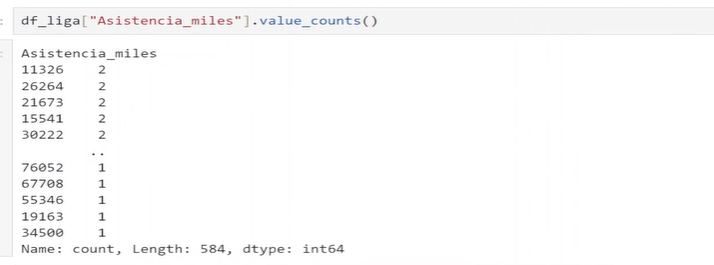

In [12]:
# df_liga["Asistencia_miles"].value_counts()

# No se puede hacer porque no existe la columna "Asistencia_miles" en este DataFrame

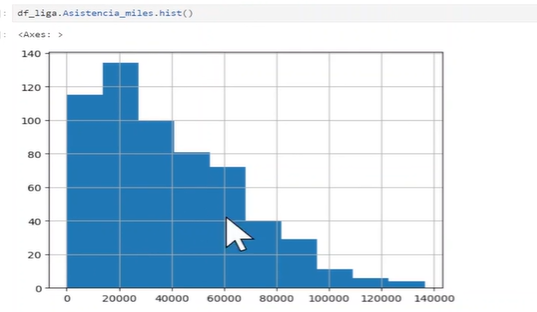


Puede ser interesante hacer cortes,  30.000 y 60.000 para buscar 3 binnes bien distribuidos (los puntos de corte y el número de binnes dependerán de los datos y del contexto del estudio. Elegirlos bien es cuestión de experiencia). Un criterio posible es que los binnes estén equilibrados en cuanto a número de partidos (en este caso) que haya en cada uno, pero siempre depende...

¿Y cómo se hacen bins en pandas?:

In [ ]:
# Indicándole los límites:
bins = [0,30000,60000,df_liga.Asistencia_miles.max()]
df_liga["Cat_Asistencia"] = pd.cut(df_liga.Asistencia_miles, bins, labels = ["baja","media","alta"]

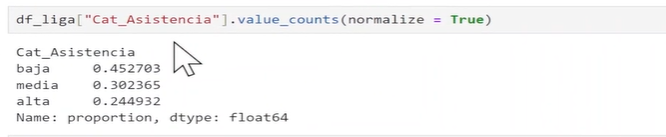

In [ ]:
# Bines de ancho equivalente
bins = 3
pd.cut(df_liga.Asistencia_miles, bins, labels = ["baja","media","alta"]).value_counts(True)

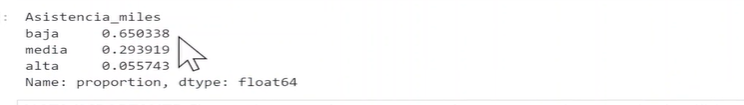

**NOTA IMPORTANTE**: 
El tratamiento que hemos comentado es un tratamiento previo al análisis, sencillo y para nada constituye el verdadero corazón del EDA que es precisamente el análisis numérico y tampoco al ánalisis y tratamiento de features que haremos antes de trabajar los modelos de Machine Learning y, en menor medida, de Deep Learning.